In [ ]:
# load environment variable from .env file
from dotenv import load_dotenv
load_dotenv()

# **GROQ API**
https://console.groq.com/keys

### Text Generation

In [1]:
from groq import Groq
def groqGeneration(user_input: str):
    client = Groq()
    completion = client.chat.completions.create(
        model="moonshotai/kimi-k2-instruct", # for more open source model vist (https://console.groq.com/docs/models)
        messages=[
          {
            "role": "user",
            "content": user_input,
          }
        ],
        temperature=1,
        max_completion_tokens=1024,
        top_p=1,
        stream=True,
        stop=None,
    )
    
    for chunk in completion:
        print(chunk.choices[0].delta.content or "", end="")


In [2]:
groqGeneration("Introduce yourself.")

I’m Kimi, your large language model trained by Moonshot AI. I can understand and respond to both English and Chinese. I’m here to assist you with any questions or tasks you have—just let me know how I can help!

## Images and Vision Capabilities
Example of using Meta's `lama-4-scout` to analyze image data.

In [6]:
from groq import Groq
from IPython.display import Image, display

def VisionModel(user_input: str, img_url: str):
    client = Groq()
    display(Image(data=img_url))
    completion = client.chat.completions.create(
        model="meta-llama/llama-4-scout-17b-16e-instruct",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": user_input
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": img_url
                        }
                    }
                ]
            }
        ],
        temperature=1,
        max_completion_tokens=1024,
        top_p=1,
        stream=False,
        stop=None,
    )
    print("Model output:")
    print(completion.choices[0].message.content)


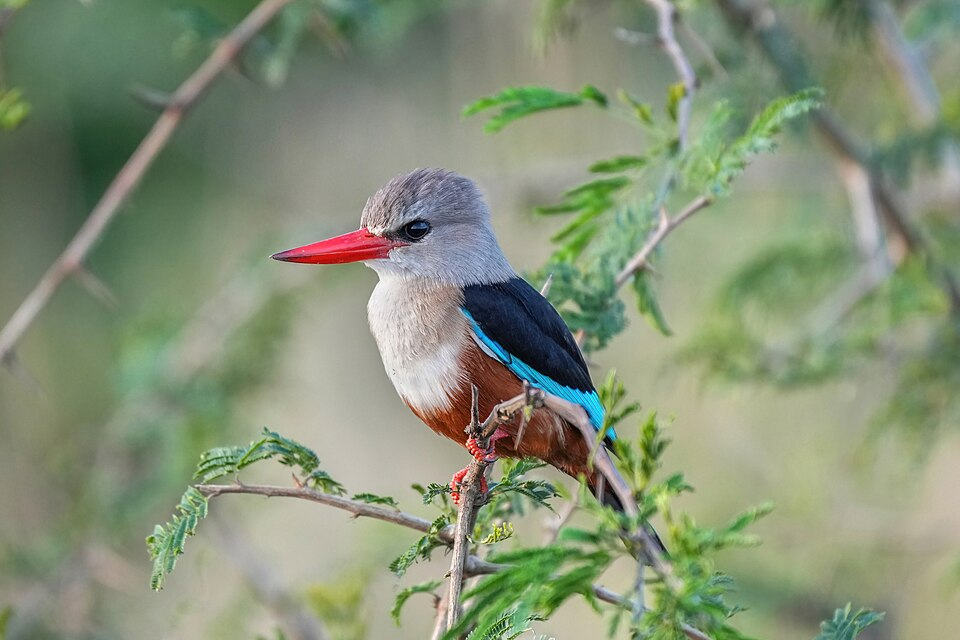

Model output:
A kingfisher with a red beak perches on a branch surrounded by lush green leaves.


In [7]:
img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/044_Grey-headed_kingfisher_at_Queen_Elizabeth_National_Park_Photo_by_Giles_Laurent.jpg/960px-044_Grey-headed_kingfisher_at_Queen_Elizabeth_National_Park_Photo_by_Giles_Laurent.jpg"
user_input = "Describe the image in 15 words."
VisionModel(user_input, img_url)